In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gas sector:


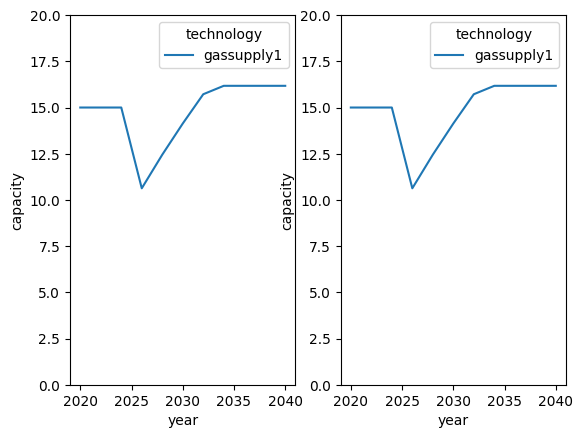

power sector:


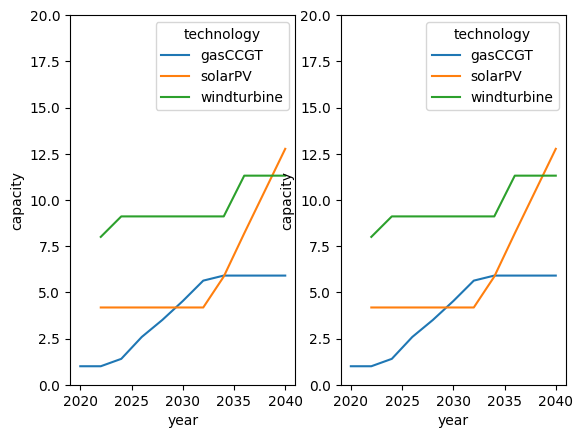

residential sector:


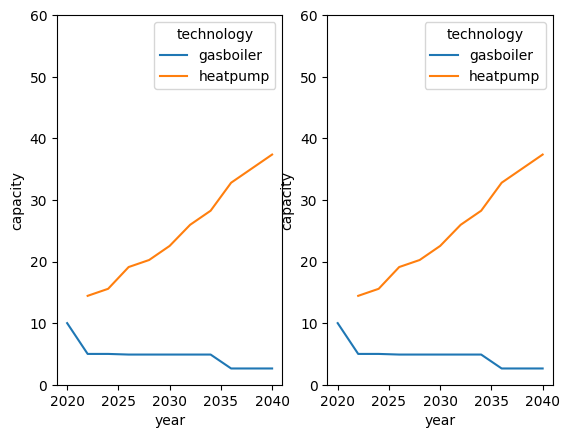

In [2]:
mca_capacity = pd.read_csv("Results/MCACapacity.csv").groupby(["technology", "sector", "region", "year"]).sum().reset_index()
limits = [20, 20,60]
sec_list = list(mca_capacity.groupby("sector").groups.keys())
for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    fig, ax =plt.subplots(1,2)
    sns.lineplot(data=sector[sector.region=="R1"], x="year", y="capacity", hue="technology", ax=ax[0])
    sns.lineplot(data=sector[sector.region=="R2"], x="year", y="capacity", hue="technology", ax=ax[1])
    ax[0].set_ylim(0, limits[sec_list.index(name)])
    ax[1].set_ylim(0, limits[sec_list.index(name)])
    plt.show()
    plt.close()


In [3]:
from pathlib import Path

path = 'Results/Residential/Capacity/'

all_files = Path(path).glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    year_needed = filename.stem
    filtered_year = df[df.year==int(year_needed)]
    li.append(filtered_year)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,Unnamed: 0,asset,year,technology,region,installed,capacity
0,0,0,2040,heatpump,R1,2030,14.8587
1,13,1,2040,heatpump,R1,2032,6.5717
2,26,2,2040,heatpump,R1,2034,8.0717
3,39,3,2040,heatpump,R1,2036,7.0717
4,52,4,2040,heatpump,R1,2038,3.4288
...,...,...,...,...,...,...,...
113,78,6,2038,heatpump,R2,2028,1.1429
114,91,7,2038,heatpump,R2,2030,14.8587
115,104,8,2038,heatpump,R2,2032,6.5717
116,117,9,2038,heatpump,R2,2034,8.0717


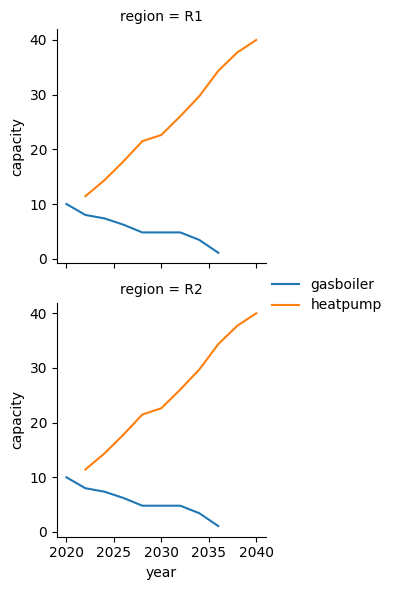

In [4]:
grouped_by = frame.groupby(["year", "technology","region"]).sum().reset_index()
grouped_by

g = sns.FacetGrid(data=grouped_by, row="region")
g.map(sns.lineplot, "year", "capacity", "technology")
g.add_legend()